In [4]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [5]:
# Load the Data
oecd_bli = pd.read_csv("../datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("../datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values="n/a")

In [6]:
# Prepare the data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

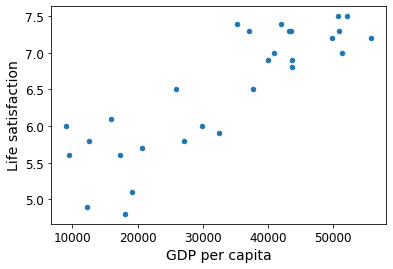

In [7]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)

LinearRegression()

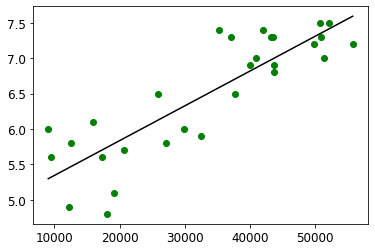

In [9]:
#Plot model line vs data scatter
plt.scatter(X, y,color='g')
plt.plot(X, model.predict(X),color='k')

In [10]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(f"Cypriots are {model.predict(X_new)} happy")

Cypriots are [[5.96242338]] happy
